In questa pagina andiamo ad analizzare tutti i costi relativi ad ogni soluzione trovata in modo da valutarne la bontà del metodo di clustering

# Plot casuale

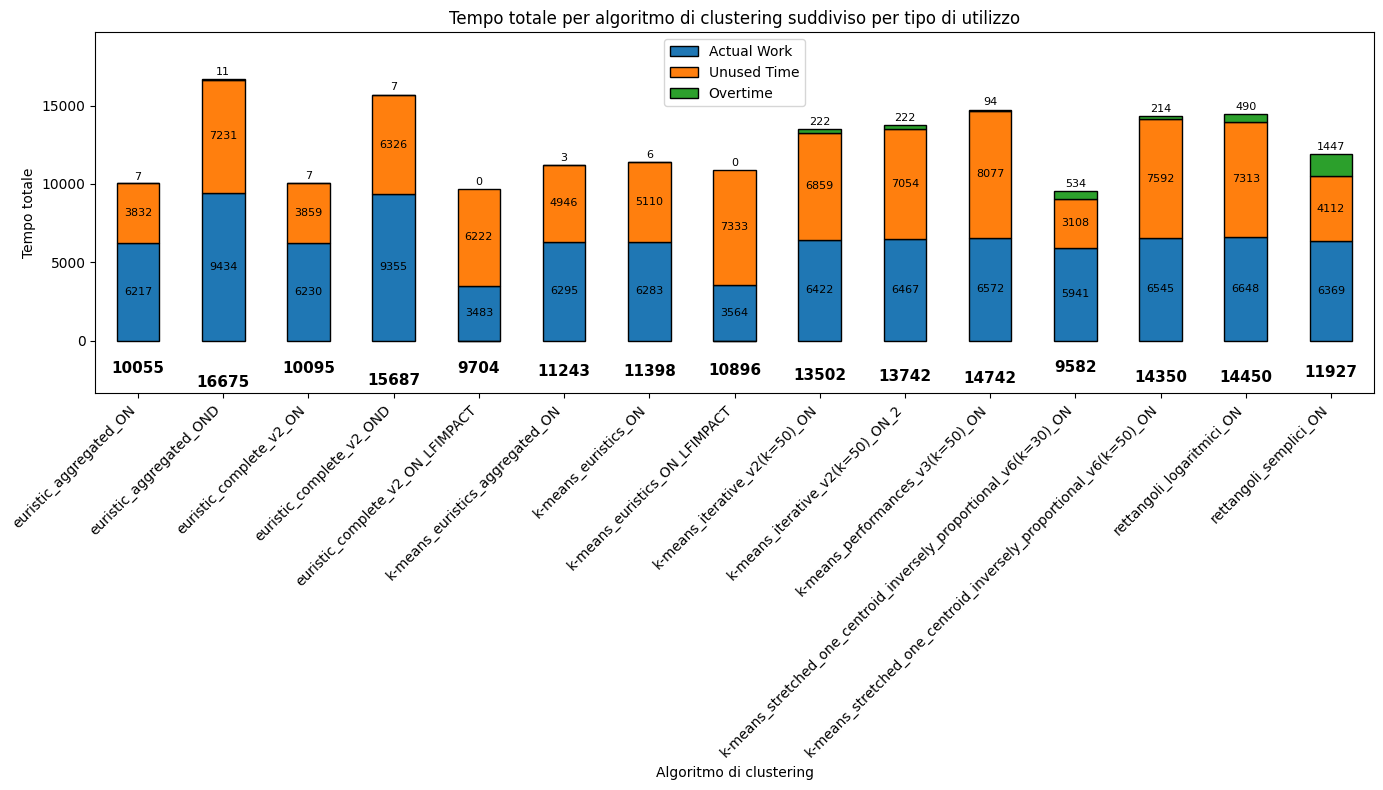

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math as m

def plot_total_costs_stacked_bar_with_top_and_base_labels(performances_folder_path="clustering_methods_performances", actual_work_cost_per_hour=1, unused_time_cost_per_hour=1, overtime_cost_per_hour=1):
    algoritmi = []
    costs_actual_work = []
    costs_unused_time = []
    costs_overtime = []

    performances_files = [f for f in os.listdir(performances_folder_path) if f.endswith('.csv') and f.__contains__('ON')]

    for file in performances_files:
        alg_name = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(performances_folder_path, file))

        # print(f"Processing {alg_name}...")

        actual_work_minutes = (df['n_days'] * df['mean_minutes']).sum()
        total_available_minutes = df['n_days'].sum() * 480
        unused_minutes = total_available_minutes - actual_work_minutes
        overtime_minutes = (df['n_overtime_days'] * df['mean_overtime_minutes']).sum()


        cost_actual = actual_work_minutes / 60 * actual_work_cost_per_hour
        cost_unused = (unused_minutes / 60) * unused_time_cost_per_hour
        cost_overtime = (overtime_minutes / 60) * overtime_cost_per_hour

        algoritmi.append(alg_name)
        costs_actual_work.append(cost_actual)
        costs_unused_time.append(cost_unused)
        costs_overtime.append(cost_overtime)

    df_costs = pd.DataFrame({
        'Actual Work': costs_actual_work,
        'Unused Time': costs_unused_time,
        'Overtime': costs_overtime
    }, index=algoritmi)

    ax = df_costs.plot(kind='bar', stacked=True, figsize=(14, 8),
                       color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

    ax.set_ylabel('Tempo totale')
    ax.set_xlabel('Algoritmo di clustering')
    ax.set_title('Tempo totale per algoritmo di clustering suddiviso per tipo di utilizzo')

    plt.xticks(rotation=45, ha='right')
    ax.margins(y=0.18)  # sposta le barre in alto per spazio alla base

    # Etichette nel grafico
    for i, alg in enumerate(algoritmi):
        bottom = 0
        for j, cost_type in enumerate(['Actual Work', 'Unused Time', 'Overtime']):
            height = df_costs.loc[alg, cost_type]
            if cost_type == 'Overtime':
                # Valore in cima alla barra
                ax.text(i, bottom + height + int(0.01*df_costs.loc[alg].sum()),
                        f"{int(m.ceil(height))}", ha='center', va='bottom', fontsize=8, color='black')
            elif height > 0.01:
                # Valori centrati nei segmenti blu/arancione
                ax.text(i, bottom + height / 2, f"{int(m.ceil(height))}",
                        ha='center', va='center', fontsize=8, color='black')
            bottom += height
        # Valore totale alla base, sotto l'etichetta x
        total = int(m.ceil(df_costs.loc[alg].sum()))
        ax.text(i, -total*0.13, f"{total}", ha='center', va='top', fontsize=11, fontweight='bold', color='black')

    # Sposta le label x più in alto per spazio ai totali
    ax.set_ylim(bottom=-max(df_costs.sum(axis=1))*0.2)

    plt.tight_layout()
    plt.show()

plot_total_costs_stacked_bar_with_top_and_base_labels()


# Plot ordinato per tempo totale decrescente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math as m


def plot_total_costs_stacked_bar_with_top_and_base_labels(folder_path="clustering_methods_performances", actual_work_cost_per_hour=1, unused_time_cost_per_hour=1, overtime_cost_per_hour=1):
    algoritmi = []
    costs_actual_work = []
    costs_unused_time = []
    costs_overtime = []
    total_minutes_list = []  # AGGIUNTO: lista per memorizzare i totali


    files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f.__contains__('ON')]

    # selezione manuale degli indici
    indici_da_prendere = [2,5,7,9,11,12,13]
    files = [files[i] for i in indici_da_prendere]


    for file in files:
        alg_name = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(folder_path, file))


        # print(f"Processing {alg_name}...")


        actual_work_minutes = (df['n_days'] * df['mean_minutes']).sum()
        total_available_minutes = df['n_days'].sum() * 480
        unused_minutes = total_available_minutes - actual_work_minutes
        overtime_minutes = (df['n_overtime_days'] * df['mean_overtime_minutes']).sum()
        total_minutes = total_available_minutes + overtime_minutes


        cost_actual = actual_work_minutes / 60 * actual_work_cost_per_hour
        cost_unused = (unused_minutes / 60) * unused_time_cost_per_hour
        cost_overtime = (overtime_minutes / 60) * overtime_cost_per_hour


        algoritmi.append(alg_name)
        costs_actual_work.append(cost_actual)
        costs_unused_time.append(cost_unused)
        costs_overtime.append(cost_overtime)
        total_minutes_list.append(total_minutes)  # AGGIUNTO: salva il totale


    # NUOVO: Crea DataFrame per ordinamento
    data_for_sorting = pd.DataFrame({
        'algoritmo': algoritmi,
        'Actual Work': costs_actual_work,
        'Unused Time': costs_unused_time,
        'Overtime': costs_overtime,
        'total_minutes': total_minutes_list
    })
    
    # ORDINA per total_minutes in ordine DECRESCENTE
    data_for_sorting = data_for_sorting.sort_values('total_minutes', ascending=False).reset_index(drop=True)
    
    # Estrae gli algoritmi ordinati e i costi corrispondenti
    algoritmi_ordinati = data_for_sorting['algoritmo'].tolist()
    costs_actual_work_ordinati = data_for_sorting['Actual Work'].tolist()
    costs_unused_time_ordinati = data_for_sorting['Unused Time'].tolist()
    costs_overtime_ordinati = data_for_sorting['Overtime'].tolist()


    # Crea DataFrame ordinato per il plot
    df_costs = pd.DataFrame({
        'Actual Work': costs_actual_work_ordinati,
        'Unused Time': costs_unused_time_ordinati,
        'Overtime': costs_overtime_ordinati
    }, index=algoritmi_ordinati)


    ax = df_costs.plot(kind='bar', stacked=True, figsize=(14, 8),
                       color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')


    ax.set_ylabel('Tempo totale')
    ax.set_xlabel('Algoritmo di clustering')
    ax.set_title('Tempo totale (ore) per algoritmo di clustering (ordinati per tempo totale decrescente)')


    plt.xticks(rotation=45, ha='right')
    ax.margins(y=0.18)  # sposta le barre in alto per spazio alla base


    # Etichette nel grafico (usa la lista ordinata)
    for i, alg in enumerate(algoritmi_ordinati):
        bottom = 0
        for j, cost_type in enumerate(['Actual Work', 'Unused Time', 'Overtime']):
            height = df_costs.loc[alg, cost_type]
            if cost_type == 'Overtime':
                # Valore in cima alla barra
                ax.text(i, bottom + height + int(0.01*df_costs.loc[alg].sum()),
                        f"{int(m.ceil(height))}", ha='center', va='bottom', fontsize=8, color='black')
            elif height > 0.01:
                # Valori centrati nei segmenti blu/arancione
                ax.text(i, bottom + height / 2, f"{int(m.ceil(height))}",
                        ha='center', va='center', fontsize=8, color='black')
            bottom += height
        # Valore totale alla base, sotto l'etichetta x
        total = int(m.ceil(df_costs.loc[alg].sum()))
        ax.text(i, -total*0.13, f"{total}", ha='center', va='top', fontsize=11, fontweight='bold', color='black')


    # Sposta le label x più in alto per spazio ai totali
    ax.set_ylim(bottom=-max(df_costs.sum(axis=1))*0.2)


    plt.tight_layout()
    plt.show()


plot_total_costs_stacked_bar_with_top_and_base_labels()


# Plot casuale con numero di veicoli

### Vecchio metodo - NON USARE!

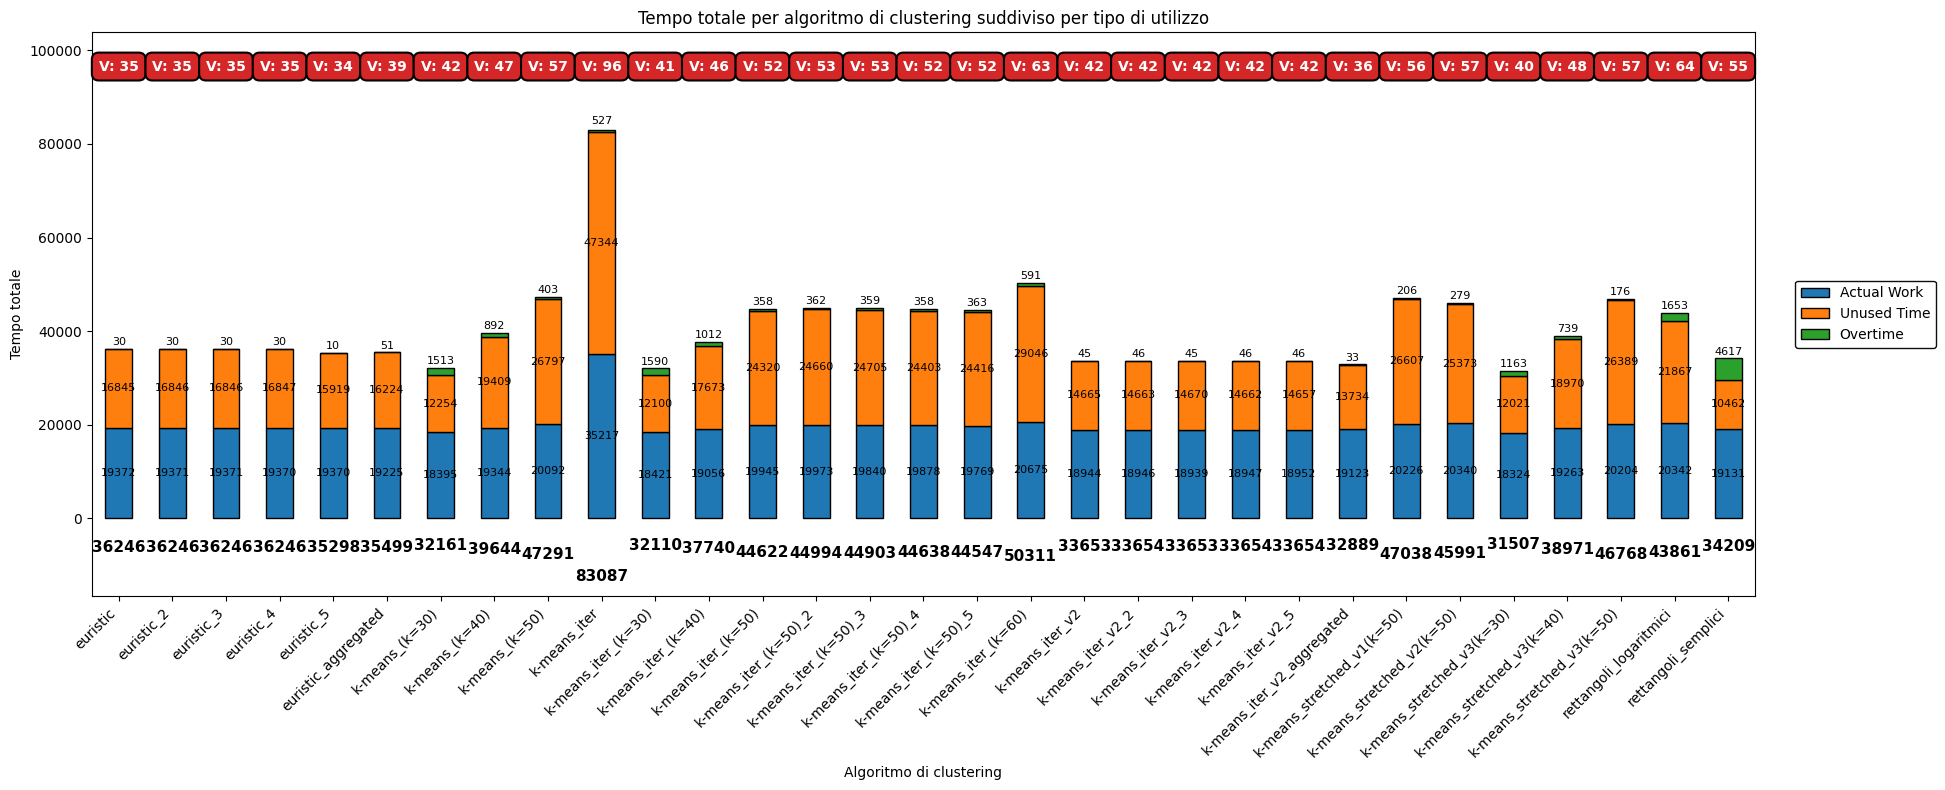

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math as m


def calculate_vehicles(df):
    """
    Calcola il numero di veicoli necessari per un algoritmo di clustering.

    Args:
        df: DataFrame con colonne cluster, mean_overtime_minutes, n_overtime_days

    Returns:
        int: Numero totale di veicoli necessari
    """
    # Numero base di veicoli = cluster unici
    base_vehicles = df['cluster'].nunique()
    additional_vehicles = 0

    # Aggrega per cluster
    cluster_agg = df.groupby('cluster').agg({
        'mean_overtime_minutes': 'max',
        'n_overtime_days': 'max'
    }).reset_index()

    for _, row in cluster_agg.iterrows():
        max_overtime_min = row['mean_overtime_minutes']
        n_overtime_days = row['n_overtime_days']

        # Controllo 1: se max mean_overtime_minutes > 30
        if max_overtime_min > 30:
            additional_vehicles += m.ceil(max_overtime_min / 480)

        # Controllo 2: se n_overtime_days > 6 E mean_overtime_minutes <= 30
        elif n_overtime_days > 6 and max_overtime_min <= 30:
            additional_vehicles += 1

    return base_vehicles + additional_vehicles


def plot_total_costs_stacked_bar_with_top_and_base_labels(
    performances_folder_path="clustering_methods_performances", 
    actual_work_cost_per_hour=1, 
    unused_time_cost_per_hour=1, 
    overtime_cost_per_hour=1
):
    algoritmi = []
    costs_actual_work = []
    costs_unused_time = []
    costs_overtime = []
    n_vehicles = []  # Lista per il numero di veicoli

    performances_files = [f for f in os.listdir(performances_folder_path) 
                         if f.endswith('.csv') and not f.__contains__('ON') and not f.__contains__('AS') and not f.__contains__('LFIMPACT')]

    for file in performances_files:
        alg_name = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(performances_folder_path, file))

        # Calcola numero di veicoli
        vehicles = calculate_vehicles(df)
        n_vehicles.append(vehicles)

        actual_work_minutes = (df['n_days'] * df['mean_minutes']).sum()
        total_available_minutes = df['n_days'].sum() * 480
        unused_minutes = total_available_minutes - actual_work_minutes
        overtime_minutes = (df['n_overtime_days'] * df['mean_overtime_minutes']).sum()

        cost_actual = actual_work_minutes / 60 * actual_work_cost_per_hour
        cost_unused = (unused_minutes / 60) * unused_time_cost_per_hour
        cost_overtime = (overtime_minutes / 60) * overtime_cost_per_hour

        algoritmi.append(alg_name)
        costs_actual_work.append(cost_actual)
        costs_unused_time.append(cost_unused)
        costs_overtime.append(cost_overtime)

    df_costs = pd.DataFrame({
        'Actual Work': costs_actual_work,
        'Unused Time': costs_unused_time,
        'Overtime': costs_overtime,
        'Vehicles': n_vehicles
    }, index=algoritmi)

    # Crea figura con spazio a destra per la legenda
    fig, ax = plt.subplots(figsize=(20, 8))

    df_costs[['Actual Work', 'Unused Time', 'Overtime']].plot(
        kind='bar', stacked=True, ax=ax,
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black'
    )

    ax.set_ylabel('Tempo totale')
    ax.set_xlabel('Algoritmo di clustering')
    ax.set_title('Tempo totale per algoritmo di clustering suddiviso per tipo di utilizzo')

    plt.xticks(rotation=45, ha='right')

    # Calcola il massimo totale delle barre
    max_total = max(df_costs[['Actual Work', 'Unused Time', 'Overtime']].sum(axis=1))

    # Imposta limiti: almeno 10% in più del massimo per evitare sovrapposizioni
    ax.set_ylim(bottom=-max_total*0.2, top=max_total * 1.25)

    # Posiziona la legenda fuori dal grafico a destra
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), framealpha=0.95, edgecolor='black')

    # Etichette nel grafico
    for i, alg in enumerate(algoritmi):
        bottom = 0

        for j, cost_type in enumerate(['Actual Work', 'Unused Time', 'Overtime']):
            height = df_costs.loc[alg, cost_type]

            if cost_type == 'Overtime':
                # Valore overtime SOPRA la barra (come prima) in nero
                if height > 0:
                    ax.text(i, bottom + height + int(0.01*df_costs.loc[alg, ['Actual Work', 'Unused Time', 'Overtime']].sum()),
                            f"{int(m.ceil(height))}", ha='center', va='bottom', fontsize=8, color='black')
            elif height > 0.01:
                # Valori centrati nei segmenti blu/arancione
                ax.text(i, bottom + height / 2, f"{int(m.ceil(height))}",
                        ha='center', va='center', fontsize=8, color='black')

            bottom += height

        # *** Numero di veicoli: posizionato in alto nel grafico (fisso) ***
        vehicles_count = df_costs.loc[alg, 'Vehicles']

        # Posizione fissa in alto: 92% del limite superiore
        vehicle_y_position = max_total * 1.18

        # Etichetta veicoli evidenziata in alto
        ax.text(i, vehicle_y_position, 
                f"V: {vehicles_count}", 
                ha='center', va='top', 
                fontsize=10, fontweight='bold', 
                color='white',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#d62728', 
                         edgecolor='black', linewidth=1.5))

        # Valore totale alla base, sotto l'etichetta x
        total = int(m.ceil(df_costs.loc[alg, ['Actual Work', 'Unused Time', 'Overtime']].sum()))
        ax.text(i, -total*0.13, f"{total}", ha='center', va='top', 
                fontsize=11, fontweight='bold', color='black')

    # Aggiusta il layout per fare spazio alla legenda a destra
    plt.tight_layout()
    plt.subplots_adjust(right=0.88)  # Lascia spazio a destra per la legenda

    plt.show()


# Esegui la funzione
plot_total_costs_stacked_bar_with_top_and_base_labels()


### Motodo alternativo di calcolo num veicoli

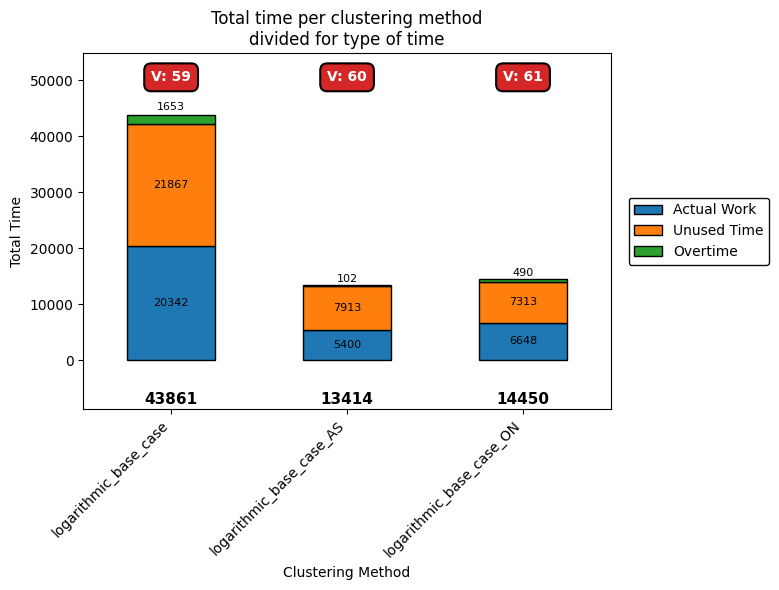

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math as m


def calculate_vehicles(df):
    """
    Calcola il numero di veicoli necessari per un algoritmo di clustering.

    Args:
        df: DataFrame con colonne cluster, weekday_name, max_overtime_minutes

    Returns:
        int: Numero totale di veicoli necessari
    """
    # Numero base di veicoli = cluster unici
    base_vehicles = df['cluster'].nunique()
    
    # Calcola la somma di max_overtime_minutes per ogni giorno della settimana
    overtime_by_weekday = df.groupby('weekday_name')['mean_overtime_minutes'].sum()
    
    # Trova il massimo tra le cinque somme (giorni lavorativi)
    # Aggiunge un ora ogni 420 minuti di overtime per compensare lo spostamento da una zona ad un altra
    max_overtime_sum = overtime_by_weekday.max()
    
    # Aggiunge i veicoli extra con una tolleranza di 60 minuti di ritardo medio (60 sonon stati aggiunti nel passo precedente quindi il controllo è su 120min)
    if max_overtime_sum > 60:
        # Calcola i veicoli aggiuntivi: massimo diviso 480, arrotondato per eccesso
        additional_vehicles = m.ceil(max_overtime_sum / 420)
    
    return base_vehicles + additional_vehicles


def plot_total_costs_stacked_bar_with_top_and_base_labels(
    performances_folder_path="clustering_methods_performances", 
    actual_work_cost_per_hour=1, 
    unused_time_cost_per_hour=1, 
    overtime_cost_per_hour=1
):
    algoritmi = []
    costs_actual_work = []
    costs_unused_time = []
    costs_overtime = []
    n_vehicles = []  # Lista per il numero di veicoli

    performances_files = [f for f in os.listdir(performances_folder_path) if f.endswith('.csv') 
                        # and 'er_(' in f
                        and any(x in f for x in ['log'])
                        and not any(x in f for x in [ 'ed_v1', 'ed_v2', 'aggreg', 'D',  '60', 'LFIMPACT'])]

    
    # performances_files = performances_files[::-1]
    # performances_files = performances_files[0:3] + performances_files[9:10] + performances_files[18:19] + performances_files[-1:]
    # # performances_files = performances_files[:3]
    # var_scambio = performances_files[4]
    # # performances_files[3:5] = performances_files[2:4]

    # performances_files[4] = performances_files[3]
    # # performances_files[5] = var_scambio
    # # var_scambio = performances_files[3]
    # # performances_files[3] = performances_files[2]
    # performances_files[3] = var_scambio

    for file in performances_files:
        alg_name = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(performances_folder_path, file))

        # Calcola numero di veicoli
        vehicles = calculate_vehicles(df)
        n_vehicles.append(vehicles)

        actual_work_minutes = (df['n_days'] * df['mean_minutes']).sum()
        total_available_minutes = df['n_days'].sum() * 480
        unused_minutes = total_available_minutes - actual_work_minutes
        overtime_minutes = (df['n_overtime_days'] * df['mean_overtime_minutes']).sum()

        cost_actual = actual_work_minutes / 60 * actual_work_cost_per_hour
        cost_unused = (unused_minutes / 60) * unused_time_cost_per_hour
        cost_overtime = (overtime_minutes / 60) * overtime_cost_per_hour

        algoritmi.append(alg_name)
        costs_actual_work.append(cost_actual)
        costs_unused_time.append(cost_unused)
        costs_overtime.append(cost_overtime)

    df_costs = pd.DataFrame({
        'Actual Work': costs_actual_work,
        'Unused Time': costs_unused_time,
        'Overtime': costs_overtime,
        'Vehicles': n_vehicles
    }, index=algoritmi)


    # Crea figura con spazio a destra per la legenda
    fig, ax = plt.subplots(figsize=(7, 6))

    df_costs[['Actual Work', 'Unused Time', 'Overtime']].plot(
        kind='bar', stacked=True, ax=ax,
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black'
    )

    ax.set_ylabel('Total Time')
    ax.set_xlabel('Clustering Method')
    ax.set_title('Total time per clustering method\ndivided for type of time')

    plt.xticks(rotation=45, ha='right')

    # Calcola il massimo totale delle barre
    max_total = max(df_costs[['Actual Work', 'Unused Time', 'Overtime']].sum(axis=1))

    # Imposta limiti: almeno 10% in più del massimo per evitare sovrapposizioni
    ax.set_ylim(bottom=-max_total*0.2, top=max_total * 1.25)

    # Posiziona la legenda fuori dal grafico a destra
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), framealpha=0.95, edgecolor='black')

    position_tot = 0

    # Etichette nel grafico
    for i, alg in enumerate(algoritmi):
        bottom = 0

        for j, cost_type in enumerate(['Actual Work', 'Unused Time', 'Overtime']):
            height = df_costs.loc[alg, cost_type]

            if cost_type == 'Overtime':
                # Valore overtime SOPRA la barra (come prima) in nero
                if height > 0:
                    ax.text(i, bottom + height + int(0.01*df_costs.loc[alg, ['Actual Work', 'Unused Time', 'Overtime']].sum()),
                            f"{int(m.ceil(height))}", ha='center', va='bottom', fontsize=8, color='black')
            elif height > 0.01:
                # Valori centrati nei segmenti blu/arancione
                ax.text(i, bottom + height / 2, f"{int(m.ceil(height))}",
                        ha='center', va='center', fontsize=8, color='black')

            bottom += height

        # *** Numero di veicoli: posizionato in alto nel grafico (fisso) ***
        vehicles_count = df_costs.loc[alg, 'Vehicles']

        # Posizione fissa in alto: 92% del limite superiore
        vehicle_y_position = max_total * 1.18

        # Etichetta veicoli evidenziata in alto
        ax.text(i, vehicle_y_position, 
                f"V: {vehicles_count}", 
                ha='center', va='top', 
                fontsize=10, fontweight='bold', 
                color='white',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#d62728', 
                         edgecolor='black', linewidth=1.5))

        
        # Valore totale alla base, sotto l'etichetta x
        total = int(m.ceil(df_costs.loc[alg, ['Actual Work', 'Unused Time', 'Overtime']].sum()))
        if not position_tot:
            position_tot = -total*0.13
        ax.text(i, position_tot, f"{total}", ha='center', va='top', 
                fontsize=11, fontweight='bold', color='black')
        
    # Aggiusta il layout per fare spazio alla legenda a destra
    plt.tight_layout()
    plt.subplots_adjust(right=0.88)  # Lascia spazio a destra per la legenda

    plt.show()


# Esegui la funzione
plot_total_costs_stacked_bar_with_top_and_base_labels()


### ordinati per tempo totale

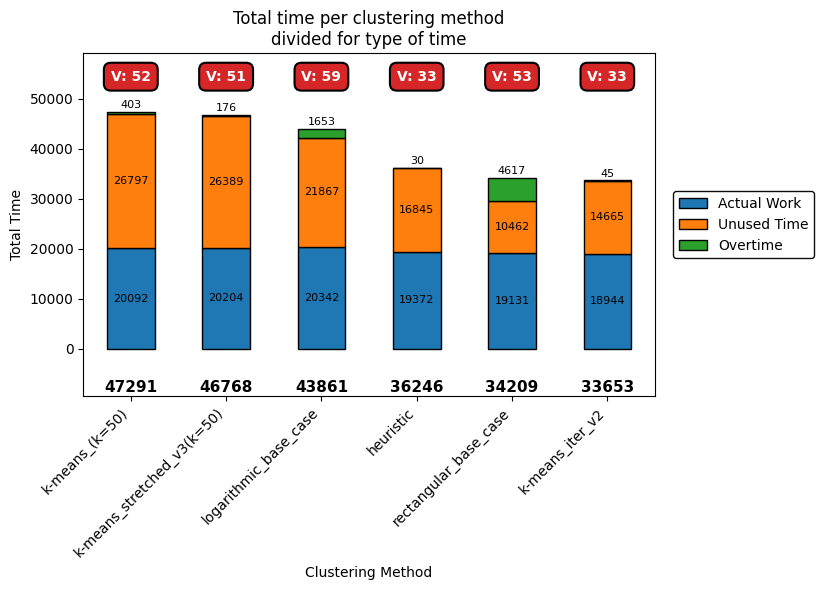

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math as m


def calculate_vehicles(df):
    base_vehicles = df['cluster'].nunique()
    overtime_by_weekday = df.groupby('weekday_name')['mean_overtime_minutes'].sum()
    max_overtime_sum = overtime_by_weekday.max()

    additional_vehicles = 0
    if max_overtime_sum > 60:
        additional_vehicles = m.ceil(max_overtime_sum / 420)
    return base_vehicles + additional_vehicles


def plot_total_costs_stacked_bar_with_top_and_base_labels(
    performances_folder_path="clustering_methods_performances", 
    actual_work_cost_per_hour=1, 
    unused_time_cost_per_hour=1, 
    overtime_cost_per_hour=1
):
    algoritmi = []
    costs_actual_work = []
    costs_unused_time = []
    costs_overtime = []
    n_vehicles = []

    performances_files = [f for f in os.listdir(performances_folder_path) if f.endswith('.csv') 
                        # and 'recta' in f
                        # and not any(x in f for x in ['ed_v1', 'ed_v2', 'aggreg', 'D', '30', '40', '60', 'LFIMPACT'])]
                        # and 'AS' in f 
                        # and f.__contains__('k=50')
                        and not 'AS' in f 
                        and not 'ON' in f
                        and not 'ed_v1' in f
                        and not 'ed_v2' in f
                         and not f.__contains__('_2') 
                         and not f.__contains__('_3')
                         and not f.__contains__('_4')
                         and not f.__contains__('_5') 
                         and not f.__contains__('aggreg')
                         and not f.__contains__('D')
                         and not f.__contains__('30')
                         and not f.__contains__('40')
                         and not f.__contains__('60')
                         and not f.__contains__('er_(')
                         and not f.__contains__('LFIMPACT')]
                        
    
    performances_files = performances_files[::-1]
    performances_files = performances_files[0:4] + performances_files[5:]

    for file in performances_files:
        alg_name = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(performances_folder_path, file))

        vehicles = calculate_vehicles(df)
        n_vehicles.append(vehicles)

        actual_work_minutes = (df['n_days'] * df['mean_minutes']).sum()
        total_available_minutes = df['n_days'].sum() * 480
        unused_minutes = total_available_minutes - actual_work_minutes
        overtime_minutes = (df['n_overtime_days'] * df['mean_overtime_minutes']).sum()

        cost_actual = (actual_work_minutes / 60) * actual_work_cost_per_hour
        cost_unused = (unused_minutes / 60) * unused_time_cost_per_hour
        cost_overtime = (overtime_minutes / 60) * overtime_cost_per_hour

        algoritmi.append(alg_name)
        costs_actual_work.append(cost_actual)
        costs_unused_time.append(cost_unused)
        costs_overtime.append(cost_overtime)

    df_costs = pd.DataFrame({
        'Actual Work': costs_actual_work,
        'Unused Time': costs_unused_time,
        'Overtime': costs_overtime,
        'Vehicles': n_vehicles
    }, index=algoritmi)

    # Aggiungo colonna per il tempo totale per ordinare
    df_costs['Total Time'] = df_costs['Actual Work'] + df_costs['Unused Time'] + df_costs['Overtime']

    # Ordino il DataFrame per tempo totale discendente
    df_costs = df_costs.sort_values(by='Total Time', ascending=False)

    fig, ax = plt.subplots(figsize=(7.5, 6))

    df_costs[['Actual Work', 'Unused Time', 'Overtime']].plot(
        kind='bar', stacked=True, ax=ax,
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black'
    )

    ax.set_ylabel('Total Time')
    ax.set_xlabel('Clustering Method')
    ax.set_title('Total time per clustering method\ndivided for type of time')

    plt.xticks(rotation=45, ha='right')

    max_total = df_costs[['Actual Work', 'Unused Time', 'Overtime']].sum(axis=1).max()
    ax.set_ylim(bottom=-max_total*0.2, top=max_total * 1.25)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), framealpha=0.95, edgecolor='black')

    position_tot = 0

    for i, alg in enumerate(df_costs.index):
        bottom = 0

        for cost_type in ['Actual Work', 'Unused Time', 'Overtime']:
            height = df_costs.loc[alg, cost_type]

            if cost_type == 'Overtime' and height > 0:
                ax.text(i, bottom + height + int(0.01*df_costs.loc[alg, ['Actual Work', 'Unused Time', 'Overtime']].sum()),
                        f"{int(m.ceil(height))}", ha='center', va='bottom', fontsize=8, color='black')
            elif height > 0.01:
                ax.text(i, bottom + height / 2, f"{int(m.ceil(height))}",
                        ha='center', va='center', fontsize=8, color='black')

            bottom += height

        vehicles_count = df_costs.loc[alg, 'Vehicles']
        vehicle_y_position = max_total * 1.18

        ax.text(i, vehicle_y_position, 
                f"V: {vehicles_count}", 
                ha='center', va='top', 
                fontsize=10, fontweight='bold', 
                color='white',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#d62728', 
                          edgecolor='black', linewidth=1.5))

        total = int(m.ceil(df_costs.loc[alg, ['Actual Work', 'Unused Time', 'Overtime']].sum()))
        if not position_tot:
            position_tot = -total*0.13
        ax.text(i, position_tot, f"{total}", ha='center', va='top', 
                fontsize=11, fontweight='bold', color='black')

    plt.tight_layout()
    plt.subplots_adjust(right=0.88)

    plt.show()


# Esegui la funzione
plot_total_costs_stacked_bar_with_top_and_base_labels()
# 53 full e ON 50 AS 